<h1> Advanced Regression Assignment </h1>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.


<b>The company wants to know:</b>

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

<b>Business Goal </b>

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategies.


In [ ]:
import numpy as np
import pandas as pd

In [1838]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1839]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

In [1840]:
import warnings
warnings.filterwarnings('ignore')

<h1>Understanding Data and Data Cleaning</h1>


In [1841]:
#loading the dataset
data = pd.read_csv("train.csv")

In [1842]:
print("Shape of initial Data: ", data.shape)

Shape of initial Data:  (1460, 81)


In [1843]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1844]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<h5>Data Cleaning</h5>

From above information, we can see there are some features which have significant amount of null data.

Lets remove the features with more than 80% of null Data

In [1845]:
nullDataDict = {"Feature": list(data.columns), "Null%":list(round(100 * (data.isnull().sum()/data.shape[0]),2))}
nullDataDF = pd.DataFrame(nullDataDict)
nullDataDF[nullDataDF["Null%"] > 0]

,Feature,Null%
3,LotFrontage,17.74
6,Alley,93.77
25,MasVnrType,0.55
26,MasVnrArea,0.55
30,BsmtQual,2.53
31,BsmtCond,2.53
32,BsmtExposure,2.60
33,BsmtFinType1,2.53
35,BsmtFinType2,2.60
42,Electrical,0.07


In [1846]:
# Id column is just unique identifiers so we don't need that in our model
# Form above information, we can see "PoolQC", "MiscFeature", "Alley", "Fence" have more than 80% null data

# While, FireplaceQu have 47.26% null Data. 
# Analysing the Data associated where FilePlaceQU is null,
# we can see that it is only when where house is not having fire place.
# So, for rest of the data where house is having fire place, FirePlaceQu can be important feature.

variableToRemove = ["Id", "PoolQC", "MiscFeature", "Alley", "Fence"]
data = data.drop(variableToRemove, axis = 1)

In [1847]:
#Remove Features where more than 98% of data are same
variableToRemove = []

threshold = data.shape[0] * 0.98
for col in data.columns:
    if data[col].value_counts().max() >= threshold:
        variableToRemove.append(col)

variableToRemove
data = data.drop(variableToRemove, axis = 1)
    

<h5>Imputing Data</h5>

<AxesSubplot:ylabel='LotFrontage'>

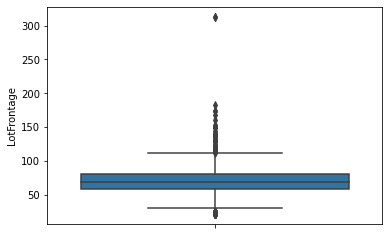

In [1848]:
sns.boxplot(data = data, y = "LotFrontage")

In [1849]:
# we could make a simple linear regression to predict the value of LotFrontage using lot area
# but using simple median too isn't making much difference in value, so lets keep it simple
lotFronageMedian = data.LotFrontage.median()
data.LotFrontage.fillna(lotFronageMedian, inplace = True)

In [1850]:
# We know FireplaceQu is null for the house which doesn't have fire place so lets impute null with NA
# later we will encode NA with '0' 
data['FireplaceQu'].fillna('Na',inplace=True)

In [1851]:
# We know, for all house where Garage related values are Null (NA), that house doesn't have the Garage,
# So, lets impute all the garage related values (where the values is null) with 'NA' or '0'
data['GarageType'].fillna('Na',inplace=True)
data['GarageFinish'].fillna('Na',inplace=True)
data['GarageCars'].fillna(0,inplace=True)
data['GarageArea'].fillna(0,inplace=True)
data['GarageQual'].fillna('Na',inplace=True)
data['GarageCond'].fillna('Na',inplace=True)
data['GarageFinish'].fillna('Na',inplace=True)

# we know, when house has no garage, Garage related fields will be null
# While we were able to impute other variables with NA or 0 values, 
# But we cannot impute Garage built year with 0, 
# We know, as the garage goes old, it decreases house price, 
# Assuming, the house which has no garage, is as bad as very old garage.
# So imputing null value will the min value of Garage Built Year.
oldestGarageBuiltYear = data['GarageYrBlt'].min()
data['GarageYrBlt'].fillna(oldestGarageBuiltYear,inplace=True)

In [1852]:
# we can perform the same logic for Basement too
# we know where total basement area is 0, the house has no basement

data.loc[data['TotalBsmtSF'] == 0, 
         ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF']] = 'Na', 'Na', 'Na', 'Na', 0, 'Na', 0, 0

For Ordinal Categorical Data, Lets encode them with proper numbers

In [1853]:
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na' : 0})

data['LotShape'] = data['LotShape'].map({'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1})
data['LandContour'] = data['LandContour'].map({'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1})
data['LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1})
data['HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                           '1.5Fin': 3, '1.5Unf': 2, '1Story': 1})
data['ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0 })
data['BsmtCond'] = data['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0 })

data['BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
data['ExterCond'] = data['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

data['HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

data['GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'Na' : 0 })
data['GarageQual'] = data['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})

data['LandSlope'] = data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})
data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})
data['GarageCond'] = data['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Na': 0})
data['PavedDrive'] = data['PavedDrive'].map({'Y': 2, 'P': 1, 'N': 0})


After treating All major Null values with different technique,

Lets First try to remove all the rows which are having Null Values and check how much of data we will loose in that

In [1854]:
temp = data
for col in temp.columns:
    temp = temp[~temp[col].isnull()]

print("Data Loss:", (data.shape[0] - temp.shape[0]) * 100 / data.shape[0])

Data Loss: 0.7534246575342466


In [1855]:
# Only 0.75% of data will be lost if we simply drop all the reconrds with null values
data = temp

In [1856]:
#Lets check one more time if we have any Null Data left
nullDataDict = {"Feature": list(data.columns), "Null%":list(round(100 * (data.isnull().sum()/data.shape[0]),2))}
nullDataDF = pd.DataFrame(nullDataDict)
nullDataDF = nullDataDF[nullDataDF["Null%"] > 0]
nullDataDF

,Feature,Null%


<h5>Handling Outliers</h5>

In [1857]:
descDF = data.describe([0.01, 0.25,0.50,0.75, 0.95,0.98,0.99])
descDF

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,...,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,56.956522,69.838509,10505.292616,3.591442,3.812974,4.582471,2.937198,2.655625,6.091787,5.580400,...,2.807453,1.855072,94.443754,46.420290,21.982747,15.175293,43.819186,6.319531,2007.815735,180544.563147
std,42.368404,22.055684,9999.462295,0.582985,0.608592,0.774416,0.277226,1.943817,1.381306,1.113976,...,0.722220,0.498316,125.492157,66.081656,61.144960,55.953287,497.989369,2.698099,1.329074,79319.721026
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
1%,20.000000,21.000000,1680.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,61663.840000
25%,20.000000,60.000000,7535.000000,3.000000,4.000000,4.000000,3.000000,1.000000,5.000000,5.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9464.000000,4.000000,4.000000,5.000000,3.000000,2.000000,6.000000,5.000000,...,3.000000,2.000000,0.000000,24.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,70.000000,79.000000,11600.000000,4.000000,4.000000,5.000000,3.000000,4.000000,7.000000,6.000000,...,3.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,160.000000,104.000000,17326.800000,4.000000,4.000000,5.000000,3.000000,7.000000,8.000000,8.000000,...,3.000000,2.000000,335.000000,173.200000,180.000000,160.000000,0.000000,11.000000,2010.000000,325849.600000
98%,190.000000,121.000000,25102.640000,4.000000,4.000000,5.000000,3.000000,8.000000,9.000000,8.000000,...,3.000000,2.000000,431.000000,241.080000,236.000000,224.000000,500.000000,12.000000,2010.000000,394632.320000


if gap between 99 and 100 percentile is greater than the gap between 75 percentile and 25th percentile,

we will consider till 99 percentile only and drop the data beyond that.

for now, we are not dropping lower limit outliers.

In [1858]:
outliersDict = {}
for col in descDF:
    allowedLimit = descDF[col]["75%"] - descDF[col]["25%"]
    if (descDF[col]["max"] - descDF[col]["99%"] > allowedLimit):
        outliersDict[col] = (descDF[col]["max"] - descDF[col]["99%"])/allowedLimit

outliersDict

{'LotFrontage': 9.235789473684212,
 'LotArea': 43.63860270602707,
 'MasVnrArea': 4.866506024096386,
 'ExterCond': inf,
 'BsmtFinSF1': 5.766968838526912,
 'BsmtFinSF2': inf,
 'TotalBsmtSF': 7.898725099601594,
 '1stFlrSF': 4.871905697445973,
 'GrLivArea': 3.8818518518518528,
 'BsmtHalfBath': inf,
 'BedroomAbvGr': 3.0,
 'KitchenAbvGr': inf,
 'TotRmsAbvGrd': 1.5,
 'GarageArea': 1.6591164658634552,
 'GarageQual': inf,
 'GarageCond': inf,
 'WoodDeckSF': 2.0885714285714294,
 'OpenPorchSF': 3.83764705882353,
 'EnclosedPorch': inf,
 'ScreenPorch': inf,
 'MiscVal': inf,
 'SalePrice': 3.7525041617122477}

In [1859]:
# By analzing the features, we get to know that some of the features which are detected as containing outliers
#  are not having outliers
notOutliers = ['ExterCond','BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'GarageQual', 'GarageCond']
variablesWithOutliers = list(outliersDict.keys())
variablesWithOutliers = [var for var in variablesWithOutliers if var not in notOutliers]
variablesWithOutliers.remove('SalePrice')

In [1860]:
def PlotBoxPlots(variableList):
    plt.figure(figsize=(17, 20))
    for i in range(1, len(variableList) + 1):
        plt.subplot(10,3,i)
        sns.boxplot(y = variableList[i - 1], data = data)
    plt.show()

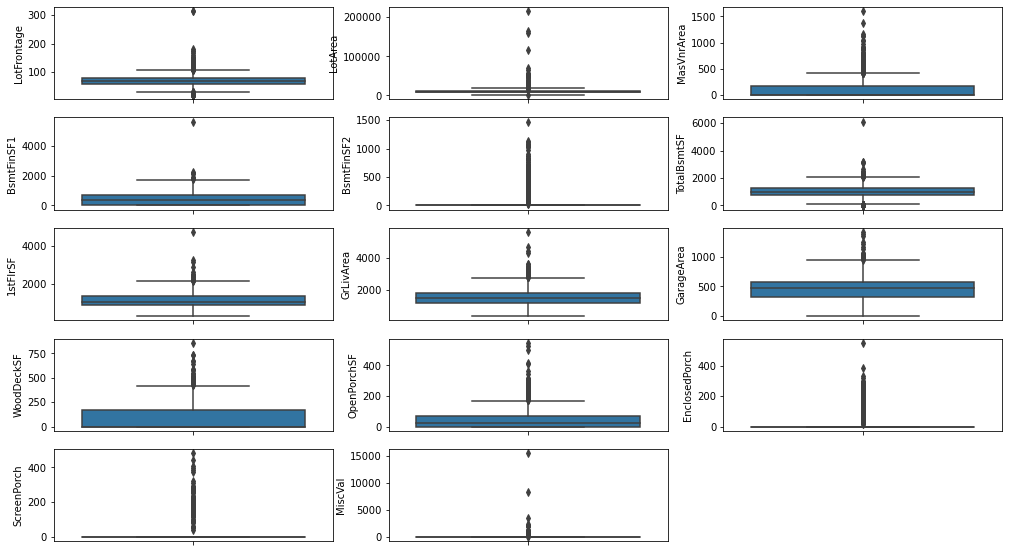

In [1861]:
#Plotting box plots before and after handing outliers
PlotBoxPlots(variablesWithOutliers)

In [1862]:
for var in variablesWithOutliers:
    data = data[(data[var] < descDF[var]["99%"])]

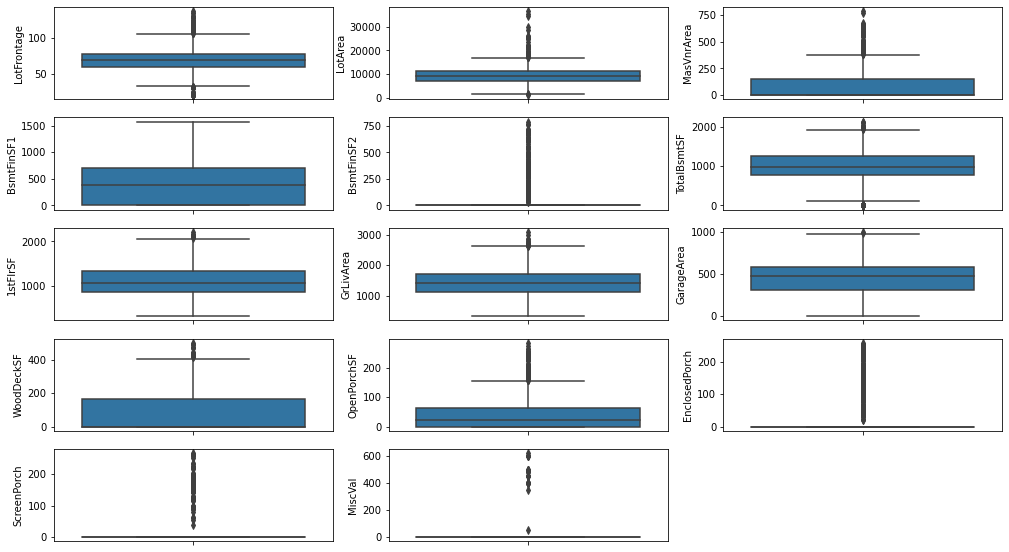

In [1863]:
PlotBoxPlots(variablesWithOutliers)

In [1864]:
print("Shape of dataset after removing outliers: " ,data.shape)

Shape of dataset after removing outliers:  (1297, 69)


In [1865]:
descDF = data.describe([0.25,0.50,0.75, 0.95,0.98,0.99])
descDF

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,...,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,56.869699,68.261372,9451.999229,3.623747,3.837317,4.595220,2.949884,2.646106,6.005397,5.569005,...,2.801850,1.854279,86.818042,41.862760,19.757903,11.430995,10.164996,6.346955,2007.813416,171993.151889
std,42.354426,18.412590,3918.659051,0.553042,0.564288,0.772048,0.241750,1.959577,1.320237,1.113911,...,0.729702,0.498035,111.011709,56.123112,54.392833,43.960087,69.091328,2.710273,1.324288,66466.908285
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7332.000000,3.000000,4.000000,4.000000,3.000000,1.000000,5.000000,5.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,128000.000000
50%,50.000000,69.000000,9200.000000,4.000000,4.000000,5.000000,3.000000,1.000000,6.000000,5.000000,...,3.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,157000.000000
75%,70.000000,78.000000,11216.000000,4.000000,4.000000,5.000000,3.000000,4.000000,7.000000,6.000000,...,3.000000,2.000000,164.000000,63.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,202500.000000
95%,160.000000,100.000000,15611.000000,4.000000,4.000000,5.000000,3.000000,7.000000,8.000000,8.000000,...,3.000000,2.000000,306.200000,160.400000,164.800000,132.400000,0.000000,11.000000,2010.000000,311574.400000
98%,180.000000,112.160000,19302.560000,4.000000,4.000000,5.000000,3.000000,8.000000,9.000000,8.000000,...,3.000000,2.000000,370.080000,207.080000,218.160000,190.160000,400.000000,12.000000,2010.000000,348160.000000
99%,190.000000,121.000000,22467.000000,4.000000,4.000000,5.000000,3.000000,8.000000,9.000000,9.000000,...,3.000000,2.000000,418.120000,238.080000,236.120000,222.080000,451.200000,12.000000,2010.000000,384291.200000


Checking for duplicate entries in dataset

In [1866]:
data[data.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Lets derive the information regarding how old the house property was when it was sold
By this, we will be able to understand if the price of house goes up/down as house goes old.

In [1867]:
data["AgeWhenSold"] = data.apply(lambda x: x["YrSold"] - x["YearRemodAdd"], axis = 1)

data["GarageAgeWhenSold"] = data.apply(lambda x: x["YrSold"] - x["GarageYrBlt"], axis = 1)
data = data.drop(["YearRemodAdd", "YearBuilt", "GarageYrBlt"], axis = 1)

<h5> Visualizing the variables </h5>

Before we create dummy variables, lets check if existing variables have correlation with each others or not

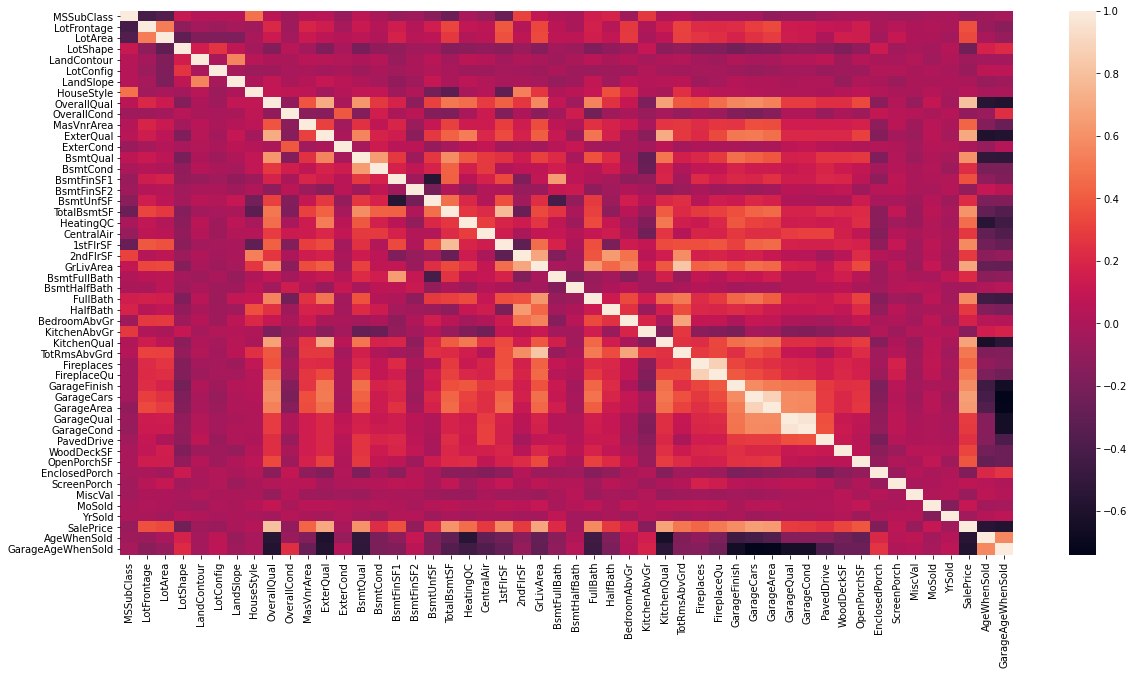

In [1868]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr())
plt.show()

Here we can see, 
1. Qualities are inversely proportional to Age (of house or Garage)
2. "Basement's unfinished square feet" is highly (-ve) correlated with "Basement's finished square feet"
3. Qualities are correlated with Sales price - in some sense, this proves linearity too


At this step, lets check how many numeric columns we have

This column list will be also used for scalling them (We don't need dummy variables in here as they would already in the scale of 0 and 1)

In [1869]:
initialNumericCols = data.select_dtypes(include='number').columns
initialNumericCols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'HouseStyle', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'AgeWhenSold', 'GarageAgeWhenSold'],
      dtype='object')

Lets plot scatter plots on numeric variables

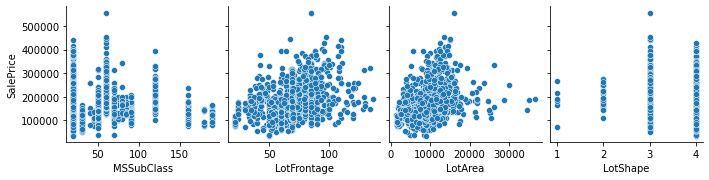

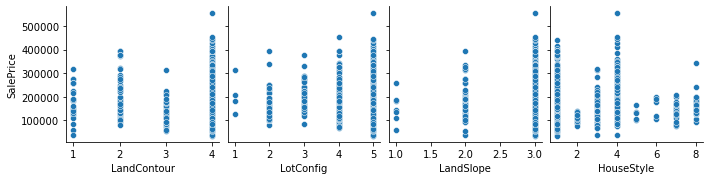

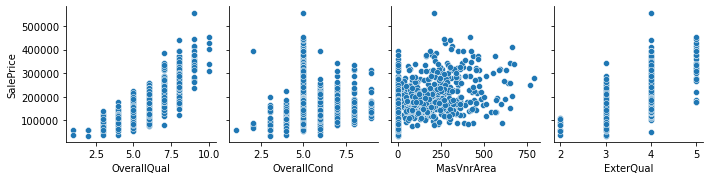

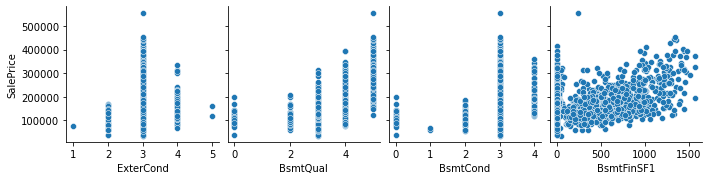

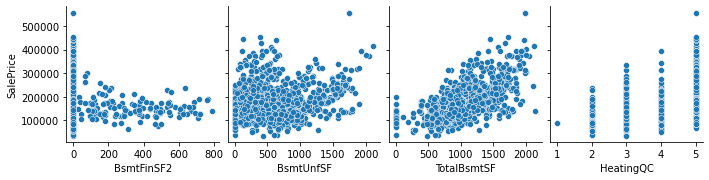

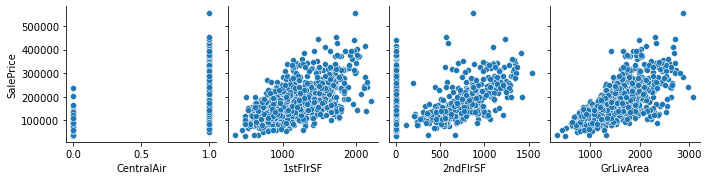

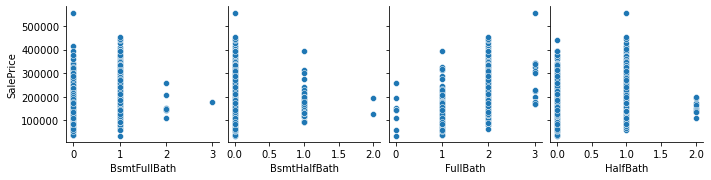

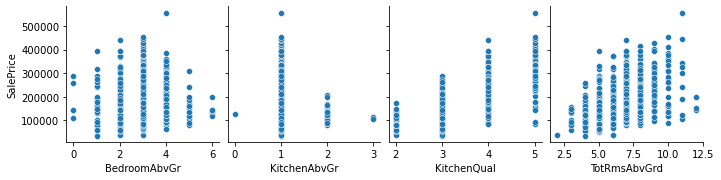

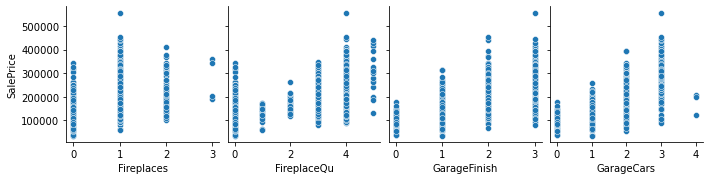

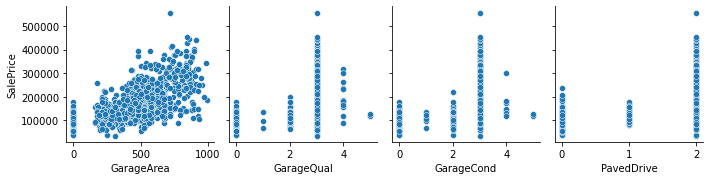

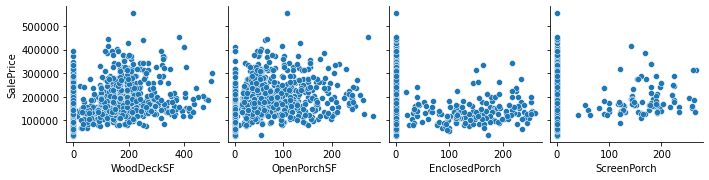

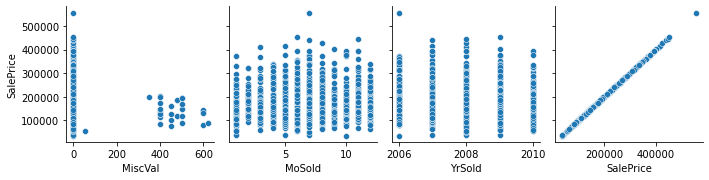

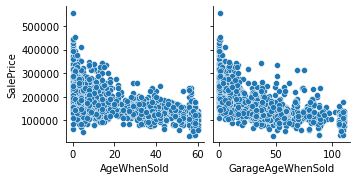

In [1870]:
iterations = int(len(initialNumericCols) / 4) + 1
for i in range(1, iterations + 1):
    sns.pairplot(data = data, x_vars = initialNumericCols[int((i-1)*4) : int(((i-1)*4) + 4)], y_vars = ['SalePrice'], diag_kind = None)


Here we can see a clear linear relation of some variables with Sales Price.

Also, lets not any perform tranformation for now, we will check for resudual's plotting for that.

Thus the first Assumption of linear regression is statisfied.

-----------------------

We have already taken care of Ordered Categorical Variables,

Now lets create Dummy Variables for un-ordered categorical variables

In [1871]:
varToCreateDummies = ['MSZoning','Neighborhood','Condition1','BldgType',
             'RoofStyle','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtExposure',
             'GarageType','SaleType','SaleCondition', 'Heating',  'Electrical', 'Functional', 'BsmtFinType1', 'BsmtFinType2']

In [1872]:
# lets check number of categories in each categorical variables.
# If some variable have more categories, we can combine some categories togather to keep dummy variables in limit
numberOfCatsDict = {}
for var in varToCreateDummies:
   numberOfCatsDict[var] = data[var].value_counts().shape

numberOfCatsDict

{'MSZoning': (5,),
 'Neighborhood': (25,),
 'Condition1': (9,),
 'BldgType': (5,),
 'RoofStyle': (6,),
 'Exterior1st': (14,),
 'Exterior2nd': (16,),
 'MasVnrType': (4,),
 'Foundation': (6,),
 'BsmtExposure': (5,),
 'GarageType': (7,),
 'SaleType': (9,),
 'SaleCondition': (6,),
 'Heating': (6,),
 'Electrical': (5,),
 'Functional': (7,),
 'BsmtFinType1': (7,),
 'BsmtFinType2': (7,)}

In [1873]:
data.Exterior1st = data.Exterior1st.apply(lambda x: "Other" if x in ['BrkComm', 'CBlock', 'AsphShn', 'ImStucc'] else x)
data.Exterior2nd = data.Exterior2nd.apply(lambda x: "Other" if x in 
                                          ['ImStucc', 'Brk Cmn', 'AsphShn', 'Stone', 'CBlock'] else x)
data.Neighborhood = data.Neighborhood.apply(lambda x: "Other" if x in ['NPkVill', 'Veenker', 'Blueste'] else x)

In [1874]:
# For Understanding purpose, we need dummay variables for all the categories, So we will not drop any dummy variables
dummyVarsDF = pd.get_dummies(data[varToCreateDummies])
data = pd.concat([data, dummyVarsDF], axis = 1)
data = data.drop(varToCreateDummies, axis = 1)

In [1875]:
print("Shape of Dataset after creating dummy variables: " , data.shape)

Shape of Dataset after creating dummy variables:  (1297, 189)


---------------

<h3> We will create models in Three ways and will compare the performance </h3>

1. Linear Regression without any Regularization

2. Linear Regression using Ridge Regularization

3. Linear Regression using Lasso Regularization

Common steps for all will be,
* Spliting data into train-test
* Scalling data

In [1876]:
#A function, that will return value of Adjusted R^2 based on the parameter passed
def CalculateAdjR2(R2Val, lengthOfSample, numberOfParam):
    return 1 - (((1 - R2Val) * (lengthOfSample - 1)) / (lengthOfSample - numberOfParam - 1))

In [1877]:
data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [1878]:
print("Overall data shape", data.shape)
print("Training data shape", data_train.shape)
print("Test data shape", data_test.shape)

Overall data shape (1297, 189)
Training data shape (907, 189)
Test data shape (390, 189)


In [1879]:
#Fitting Stadardised scaller on Train Data
scaler = StandardScaler()
data_train[data_train.columns] = scaler.fit_transform(data_train[data_train.columns])

In [1880]:
#Transforming previously fitted scaller on Test data
data_test[data_test.columns] = scaler.transform(data_test[data_test.columns])

In [1881]:
y_train = data_train.pop('SalePrice')
X_train = data_train

y_test = data_test.pop('SalePrice')
X_test = data_test

<h1>Linear Regression without Regularization</h1>

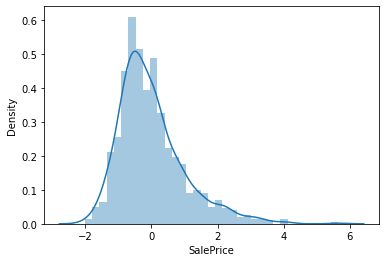

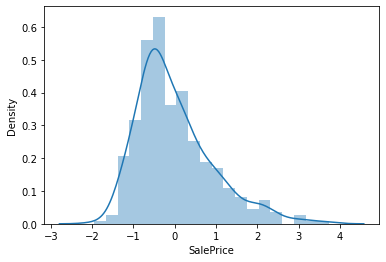

In [1882]:
#Lets plot distribution of Sale Price - Target Variable
# Actual Sale Price on Train
y_train_pred = lm.predict(X_train)
sns.distplot(y_train)
plt.show()

# Actual Sale Price on Test
y_test_pred = lm.predict(X_test)
sns.distplot(y_test)
plt.show()

Distribution of Sale Price is normal and similar in both Train and Test Data set.

So There is no imbalance in Train and Test dataset

<h5>Fitting Linear Regression on Train Dataset</h5>

In [1883]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

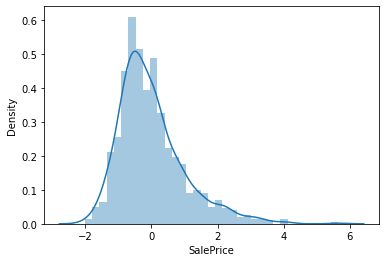

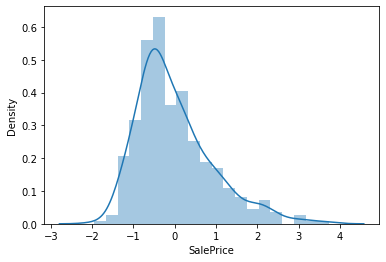

In [1884]:
#Lets plot predicted Sale price for both train and Test dataset
# Predicted Sale train for Train
y_train_pred = lm.predict(X_train)
sns.distplot(y_train)
plt.show()

# Predicted Sale train for test
y_test_pred = lm.predict(X_test)
sns.distplot(y_test)
plt.show()

In [1885]:
print("Train Set")
print(metrics.r2_score(y_true= y_train, y_pred= y_train_pred))

print('Test Set')
print(metrics.r2_score(y_true= y_test, y_pred= y_test_pred))

Train Set
0.9296003382592499
Test Set
-3.859656339778235e+20


Adjusted R square values

In [1886]:
print("Train Set")
print("Adj R2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_train, y_pred= y_train_pred), 
                                     len(y_train_pred), len(X_train.columns) ))

print('Test Set')
print("Adj R2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_test, y_pred= y_test_pred), 
                                     len(y_test_pred), len(X_test.columns) ))

Train Set
Adj R2 Val:  0.9111670006446803
Test Set
Adj R2 Val:  -7.46968316504345e+20


As we can clearly see there are some extrem values predicted for test Data set

And due to that overall R2 has gone down.

Lets try to remove those values and retry calculating the R2 and other plot Residuals

In [1887]:
y_test_data = pd.DataFrame()

y_test_data['SalePrice_test'] = y_test
y_test_data['SalePrice_test_predicted'] = y_test_pred
y_test_data['Error'] = y_test_data['SalePrice_test'] - y_test_data['SalePrice_test_predicted']

y_test_data.reset_index(inplace = True, drop = True)

In [1888]:
print(y_test_data.shape)
y_test_data = y_test_data[(y_test_data['SalePrice_test_predicted'] > -100) &
                         (y_test_data['SalePrice_test_predicted'] < 100)]
print(y_test_data.shape)

(390, 3)
(386, 3)


Here we can see, there were total 4 such records where predicted values were too high

We have removed them and now we are again calculating R^2 value

In [1889]:
print('Test Set')
print(metrics.r2_score(y_true= y_test_data['SalePrice_test'], y_pred= y_test_data['SalePrice_test_predicted']))
print("Adj R2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_test_data['SalePrice_test'], y_pred= y_test_data['SalePrice_test_predicted']), 
                                     len(y_test_pred), len(X_test.columns) ))

Test Set
0.9046644727435196
Adj R2 Val:  0.8154949248618364


This seems reasonable now

<h5>Ploting Residuals</h5>

<AxesSubplot:xlabel='SalePrice_test_predicted', ylabel='SalePrice_test'>

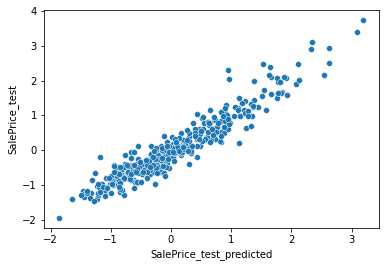

In [1890]:
# A simple scatter plot that shows relation between actual slare price and predicted sale price
fig = plt.figure()
sns.scatterplot(data=y_test_data, x="SalePrice_test_predicted", y="SalePrice_test")

Text(0, 0.5, 'Errors')

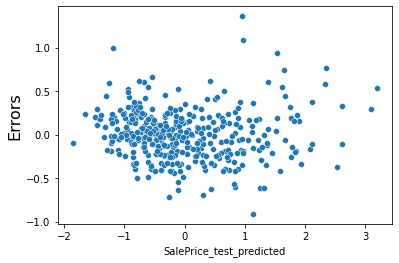

In [1891]:
# Lets check the variance in Errors, Ideally Errors should have constant variance
fig = plt.figure()
sns.scatterplot(data=y_test_data, x="SalePrice_test_predicted", y="Error")                       
plt.ylabel('Errors', fontsize=16)

From above plot, we can see Errors are almost constant and in the range of -0.5 to +0.5

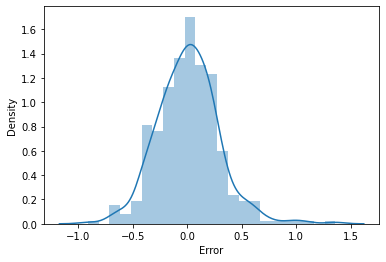

In [1892]:
sns.distplot(y_test_data['Error'])
plt.show()

Errors are normally distributed and centered to 0

<AxesSubplot:>

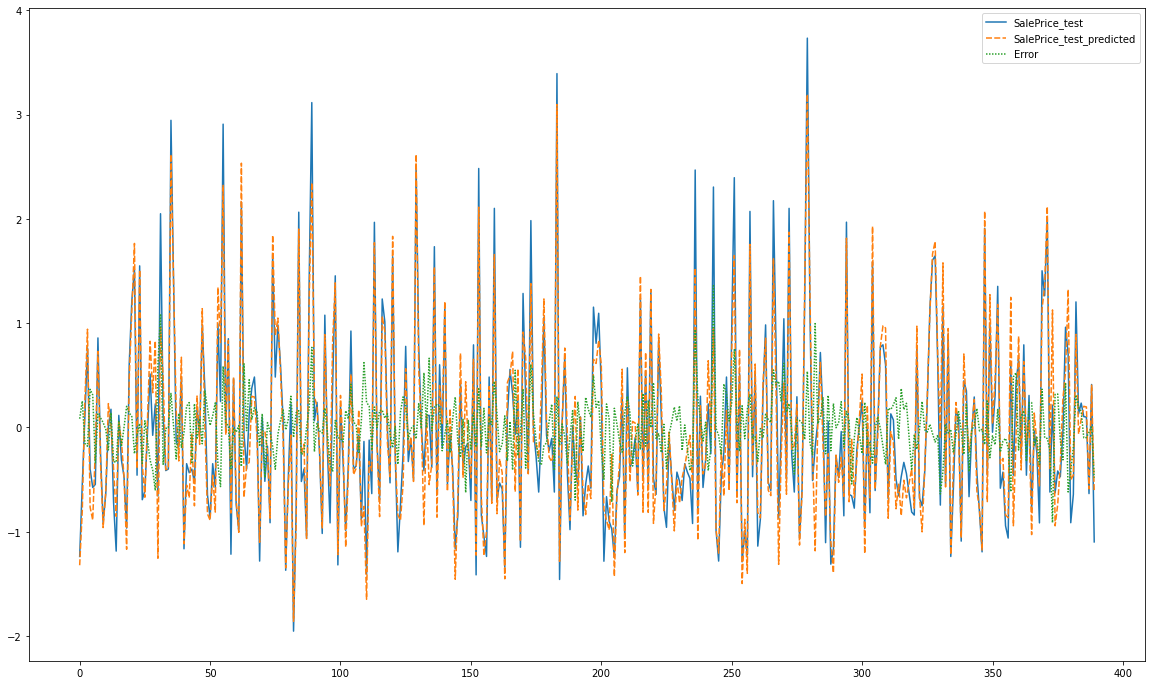

In [1893]:
#lets plot a line chart for Actual Sale price and Predicted Sale price togather
plt.figure(figsize = (20,12))
sns.lineplot(data=y_test_data)

<h1>Linear Regression using Ridge Regression</h1>

In [1894]:
def fitGridSearchCV(X, y, estimator, params, scoring, folds, refit):
    cv_model = GridSearchCV(estimator= estimator, param_grid= params, scoring = ['neg_mean_squared_error', 'r2'],
                       cv = folds, return_train_score= True, verbose = 1, refit='r2')
    cv_model.fit(X_train, y_train)
    return cv_model

In [1895]:
def displayCVResultForRidge(cv_model):
    cv_result = pd.DataFrame(cv_model.cv_results_)
    cvResultCols = ['param_alpha','mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error','rank_test_neg_mean_squared_error',
               'mean_train_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2' ]
    return cv_result[cvResultCols]

In [1896]:
# Fitting Ridge Regression model with wide range of Aplpha.
# From here we will get basic understanding where optimal alpha value shoud be
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 150.0, 200.0, 300.0, 400.0, 500.0]}
ridge = Ridge()
folds = 5 # Cross Validation

cv_model_ridge = fitGridSearchCV(X_train, y_train, ridge, params, ['neg_mean_squared_error', 'r2'], folds, 'r2')

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    1.6s finished


In [1897]:
cv_result_ridge = displayCVResultForRidge(cv_model_ridge)
cv_result_ridge

,param_alpha,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_train_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.01,-0.066452,-0.118365,0.012662,13,0.933507,0.879672,0.014588,13
1,0.1,-0.066452,-0.118295,0.012641,12,0.933507,0.879746,0.014547,12
2,0.5,-0.066459,-0.118028,0.012560,11,0.933500,0.880028,0.014390,11
3,1,-0.066472,-0.117745,0.012477,10,0.933487,0.880327,0.014226,10
4,5,-0.066622,-0.115990,0.012095,9,0.933337,0.882191,0.013278,9
5,10,-0.066842,-0.114303,0.011937,8,0.933118,0.883983,0.012521,8
6,50,-0.068698,-0.107774,0.012999,5,0.931262,0.890945,0.011170,5
7,100,-0.071138,-0.105256,0.014594,3,0.928820,0.893723,0.011602,3
8,150,-0.073610,-0.104719,0.015880,1,0.926345,0.894431,0.012221,1
9,200,-0.076064,-0.105069,0.016971,2,0.923888,0.894212,0.012816,2


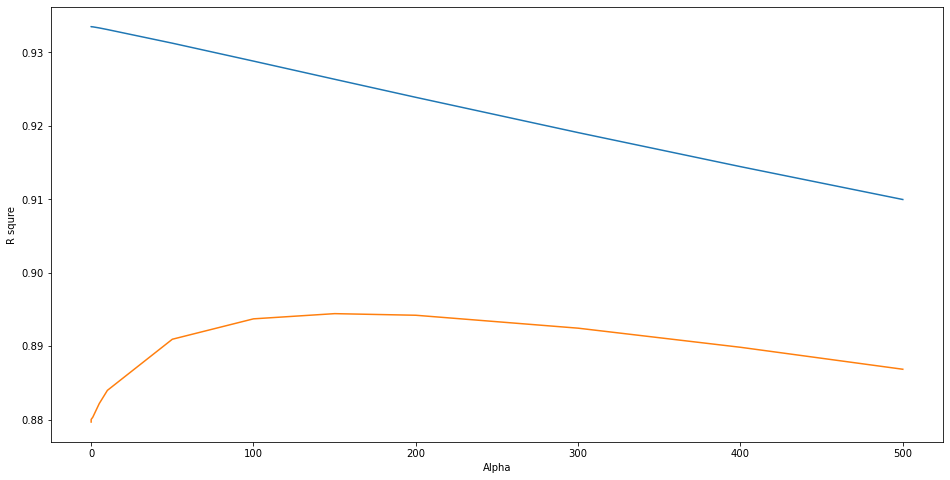

In [1898]:
#visualizing mean value of R^2 for different aplpha values (for both Test and Train dataset)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('int32')

plt.figure(figsize = (16, 8))
plt.plot(cv_result_ridge['param_alpha'], cv_result_ridge['mean_train_r2'])
plt.plot(cv_result_ridge['param_alpha'], cv_result_ridge['mean_test_r2'])
plt.xlabel('Alpha')
plt.ylabel('R squre')
plt.show()

In [1899]:
# From above model, we could see, optimla alpha is somewhere near to 150
# Lets narrow the range of Alpha values to get more accurate alpha value
params = {'alpha': [140.0, 145.0, 150.0, 155.0, 160.0, 170.0]}
ridge = Ridge()
folds = 5 # Cross Validation

cv_model_ridge = fitGridSearchCV(X_train, y_train, ridge, params, ['neg_mean_squared_error', 'r2'], folds, 'r2')


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished


In [1900]:
cv_result_ridge = displayCVResultForRidge(cv_model_ridge)
cv_result_ridge

,param_alpha,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_train_r2,mean_test_r2,std_test_r2,rank_test_r2
0,140,-0.073116,-0.104736,0.015641,5,0.926840,0.894384,0.012098,6
1,145,-0.073363,-0.104723,0.015761,2,0.926593,0.894413,0.012160,5
2,150,-0.073610,-0.104719,0.015880,1,0.926345,0.894431,0.012221,3
3,155,-0.073857,-0.104723,0.015996,3,0.926098,0.894441,0.012283,2
4,160,-0.074103,-0.104736,0.016110,4,0.925852,0.894443,0.012344,1
5,170,-0.074595,-0.104782,0.016334,6,0.925359,0.894424,0.012464,4


In [1901]:
# From above model, we could see, optimla alpha is somewhere near to 150
# Lets narrow the range of Alpha values to get more accurate alpha value
params = {'alpha': [145.0, 146.0, 147.0, 148.0, 149.0, 149.5, 149.8, 150.0, 151.0]}
ridge = Ridge()
folds = 5 # Cross Validation

cv_model_ridge = fitGridSearchCV(X_train, y_train, ridge, params, ['neg_mean_squared_error', 'r2'], folds, 'r2')
cv_result_ridge = displayCVResultForRidge(cv_model_ridge)
cv_result_ridge

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


,param_alpha,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_train_r2,mean_test_r2,std_test_r2,rank_test_r2
0,145,-0.073363,-0.104723,0.015761,9,0.926593,0.894413,0.012160,9
1,146,-0.073412,-0.104721,0.015785,8,0.926543,0.894417,0.012172,8
2,147,-0.073462,-0.104720,0.015809,7,0.926494,0.894421,0.012184,7
3,148,-0.073511,-0.104719,0.015833,6,0.926444,0.894425,0.012197,6
4,149,-0.073561,-0.104719,0.015856,4,0.926395,0.894428,0.012209,5
5,149.5,-0.073585,-0.104719,0.015868,3,0.926370,0.894430,0.012215,4
6,149.8,-0.073600,-0.104719,0.015875,1,0.926355,0.894431,0.012219,3
7,150,-0.073610,-0.104719,0.015880,2,0.926345,0.894431,0.012221,2
8,151,-0.073659,-0.104719,0.015903,5,0.926296,0.894434,0.012234,1


In [1902]:
# So now we know that alpha 149.8 has performed the best for 5 fold training data
# Lets try that on simple training data and test data
# Also, plot the errors and see if that satisfies the assumptions.

alpha = 149.8
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)

# Predict train
y_train_pred = ridge.predict(X_train)
print("Train Set")
print("R^2 Value: ", metrics.r2_score(y_true= y_train, y_pred= y_train_pred))

# Predict test
y_test_pred_ridge = ridge.predict(X_test)
print('Test Set')
print("R^2 Value: ", metrics.r2_score(y_true= y_test, y_pred= y_test_pred_ridge))

Train Set
R^2 Value:  0.9245216969727251
Test Set
R^2 Value:  0.9103458815863161


In [1903]:
print("Train Set")
print("Adj R^2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_train, y_pred= y_train_pred), 
                                     len(y_train_pred), len(X_train.columns) ))

print('Test Set')
print("Adj R^2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_test, y_pred= y_test_pred_ridge), 
                                     len(y_test_pred_ridge), len(X_test.columns) ))

Train Set
Adj R^2 Val:  0.9047585758458063
Test Set
Adj R^2 Val:  0.826490288244164


<h5>Plotting Residuals</h5>

Text(0, 0.5, 'Errors')

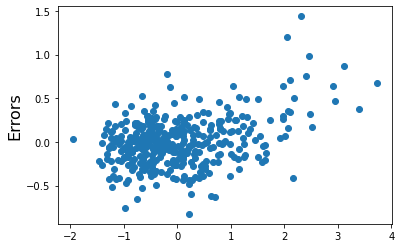

In [1904]:
fig = plt.figure()
plt.scatter(y_test, (y_test - y_test_pred_ridge))                      
plt.ylabel('Errors', fontsize=16)

we can see almost constant variance in errors (in the range of -0.5 to 0.5)

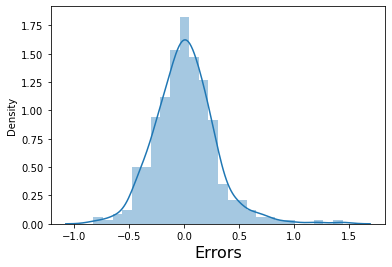

In [1905]:
sns.distplot(y_test - y_test_pred_ridge)
plt.xlabel('Errors', fontsize=16)
plt.show()

Errors are normally distributed and centered to 0

<AxesSubplot:>

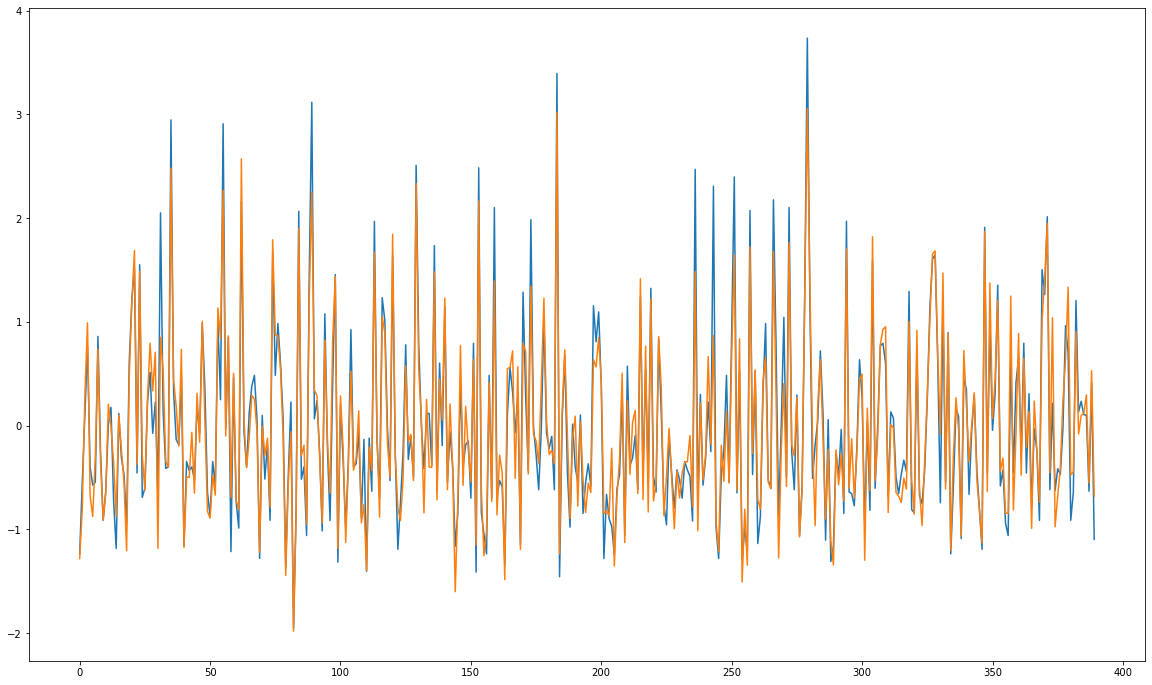

In [1906]:
#lets plot a line chart for Actual Sale price and Predicted Sale price togather
plt.figure(figsize = (20,12))
sns.lineplot(data=list(y_test))
sns.lineplot(data=list(y_test_pred_ridge))

<h1>Linear Regression using Lasso Regression</h1>

In [1907]:
# Fitting lasso Regression model with wide range of Aplpha.
# From here we will get basic understanding where optimal alpha value shoud be
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]}
lasso = Lasso()
folds = 5 # Cross Validation

cv_model_lasso = fitGridSearchCV(X_train, y_train, lasso, params, ['neg_mean_squared_error', 'r2'], folds, 'r2')

cv_result_lasso = displayCVResultForRidge(cv_model_lasso)
cv_result_lasso

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    3.0s finished


,param_alpha,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_train_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.0001,-0.066463,-0.117846,0.012310,3,0.933496,0.880176,0.014476,3
1,0.001,-0.067141,-0.112628,0.011365,2,0.932816,0.885719,0.011586,2
2,0.01,-0.079356,-0.105229,0.017991,1,0.920607,0.894244,0.011954,1
3,0.05,-0.122424,-0.137661,0.029258,4,0.877483,0.862139,0.020699,4
4,0.1,-0.165271,-0.177874,0.042979,5,0.834547,0.822671,0.028391,5
5,0.2,-0.244660,-0.251172,0.056131,6,0.755071,0.749483,0.030423,6
6,0.5,-0.580025,-0.586388,0.118239,7,0.419117,0.415197,0.032149,7
7,1,-0.999762,-1.002337,0.151344,8,0.000000,-0.006205,0.004811,8
8,10,-0.999762,-1.002337,0.151344,8,0.000000,-0.006205,0.004811,8


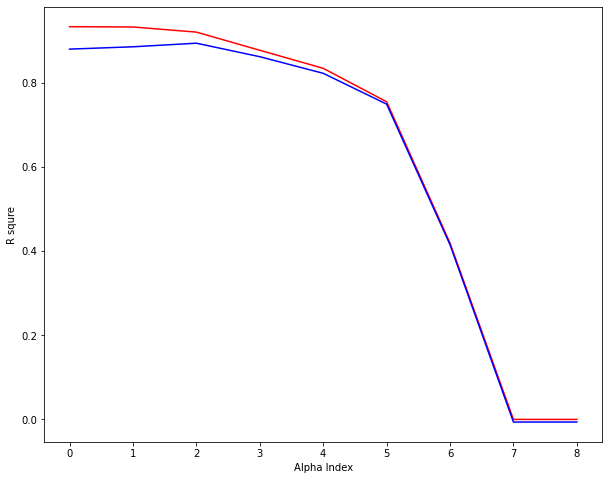

In [1908]:
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float64')

plt.figure(figsize = (10,8))
sns.lineplot(data=cv_result_lasso['mean_train_r2'], color= 'r')
sns.lineplot(data=cv_result_lasso['mean_test_r2'], color= 'b')
plt.xlabel('Alpha Index')
plt.ylabel('R squre')
plt.show()

Please Note: X-axis doesn't show the values of alpha but index of Alpha value list

In [1909]:
# From above model, we could see, optimla alpha is somewhere near to 0.01
# Lets narrow the range of Alpha values to get more accurate alpha value

params = {'alpha': [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]}
cv_model_lasso = fitGridSearchCV(X_train, y_train, lasso, params, ['neg_mean_squared_error', 'r2'], folds, 'r2')

cv_result_lasso = displayCVResultForRidge(cv_model_lasso)
cv_result_lasso

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished


,param_alpha,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_train_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.005,-0.072073,-0.105593,0.015144,6,0.927886,0.893629,0.009362,6
1,0.006,-0.073484,-0.105060,0.015823,4,0.926476,0.894265,0.009557,4
2,0.007,-0.074968,-0.104798,0.016472,2,0.924992,0.894598,0.010039,2
3,0.008,-0.076436,-0.104785,0.017071,1,0.923526,0.894654,0.010697,1
4,0.009,-0.077917,-0.104978,0.017576,3,0.922047,0.894480,0.011398,3
5,0.01,-0.079356,-0.105229,0.017991,5,0.920607,0.894244,0.011954,5
6,0.02,-0.091691,-0.110711,0.021617,7,0.908265,0.888972,0.015222,7
7,0.03,-0.101918,-0.119005,0.023975,8,0.898024,0.880695,0.017111,8
8,0.04,-0.112317,-0.128075,0.026824,9,0.887605,0.871712,0.019080,9
9,0.05,-0.122424,-0.137661,0.029258,10,0.877483,0.862139,0.020699,10


In [1910]:
# From above model, we could see, optimla alpha is somewhere near to 0.008
# Lets narrow the range of Alpha values to get more accurate alpha value

params = {'alpha': [0.0074, 0.0075,0.0076,0.0077,0.0078,0.0079, 0.008,0.0081,0.0082,0.0083,0.0084]}
cv_model_lasso = fitGridSearchCV(X_train, y_train, lasso, params, ['neg_mean_squared_error', 'r2'], folds, 'r2')

cv_result_lasso = displayCVResultForRidge(cv_model_lasso)
cv_result_lasso

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.2s finished


,param_alpha,mean_train_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,mean_train_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.0074,-0.075554,-0.104766,0.016723,4,0.924407,0.894652,0.010282,7
1,0.0075,-0.075700,-0.104763,0.016786,1,0.924261,0.894660,0.010350,4
2,0.0076,-0.075848,-0.104763,0.016851,2,0.924113,0.894664,0.010419,2
3,0.0077,-0.075995,-0.104766,0.016909,3,0.923967,0.894666,0.010489,1
4,0.0078,-0.076141,-0.104771,0.016964,5,0.923820,0.894664,0.010558,3
5,0.0079,-0.076288,-0.104777,0.017018,6,0.923674,0.894660,0.010628,5
6,0.008,-0.076436,-0.104785,0.017071,7,0.923526,0.894654,0.010697,6
7,0.0081,-0.076584,-0.104798,0.017120,8,0.923378,0.894643,0.010765,8
8,0.0082,-0.076733,-0.104814,0.017169,9,0.923229,0.894629,0.010834,9
9,0.0083,-0.076881,-0.104829,0.017223,10,0.923081,0.894617,0.010907,10


Here we are getting different alpha for rank 1 for MSE and R2

Lets consider best alpha as 0.0076

In [1911]:
# So now we know that alpha 0.0076 has performed the best for 5 fold training data
# Lets try that on simple training data and test data
# Also, plot the errors and see if that satisfies the assumptions.

alpha = 0.0076
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)

# Predict train
y_train_pred_lasso = lasso.predict(X_train)
print("Train Set")
print("R^2 value: ", metrics.r2_score(y_true= y_train, y_pred= y_train_pred_lasso))

# Predict test
y_test_pred_lasso = lasso.predict(X_test)
print('Test Set')
print("R^2 value: ", metrics.r2_score(y_true= y_test, y_pred= y_test_pred_lasso))

Train Set
R^2 value:  0.9206440357361075
Test Set
R^2 value:  0.9106459263267167


In [1912]:
# Lets Check the variables lasso model has considered.
# Picking all the variables for which coefficient is non-zero
lassoCoefficient = {}
for i in range(0, len(lasso.coef_)):
    if (lasso.coef_[i] != 0):
        lassoCoefficient[X_train.columns[i]] = lasso.coef_[i]

lassoCoefDF = pd.DataFrame({"Variable" : lassoCoefficient.keys(), "Coefficient": lassoCoefficient.values() })
print('Number of Variables taken by Lasso:', lassoCoefDF.shape[0])

Number of Variables taken by Lasso: 95


In [1913]:
print("Train Set")
print("Adj R2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_train, y_pred= y_train_pred_lasso), 
                                     len(y_train_pred_lasso), lassoCoefDF.shape[0] ))

print('Test Set')
print("Adj R2 Val: ", CalculateAdjR2(metrics.r2_score(y_true= y_test, y_pred= y_test_pred_lasso), 
                                     len(y_test_pred_lasso), lassoCoefDF.shape[0] ))

Train Set
Adj R2 Val:  0.9113483309209783
Test Set
Adj R2 Val:  0.8817730113642612


<h5>Plotting Residuals</h5>

Text(0, 0.5, 'Errors')

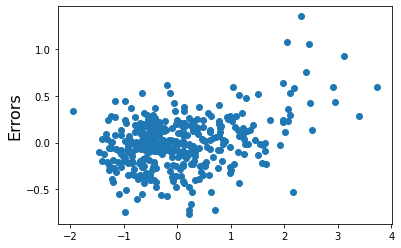

In [1914]:
fig = plt.figure()
plt.scatter(y_test, (y_test - y_test_pred_lasso))                      
plt.ylabel('Errors', fontsize=16)

Errors are mostly having constant variance and in the range -0.5 to +0.5

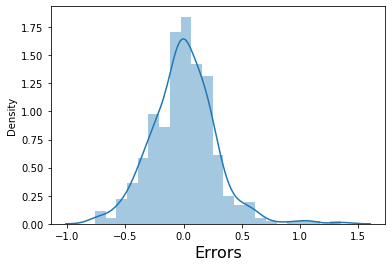

In [1915]:
sns.distplot(y_test - y_test_pred_lasso)
plt.xlabel('Errors', fontsize=16)
plt.show()

Errors are normally distributed and centered to 0

<AxesSubplot:>

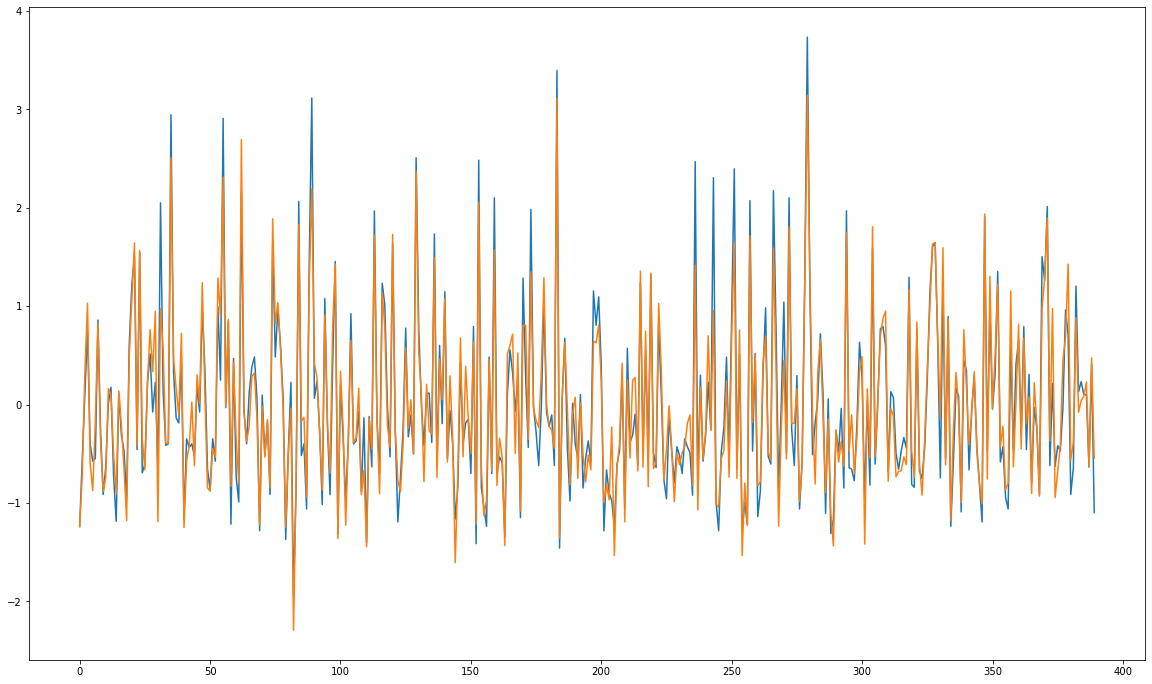

In [1916]:
#lets plot a line chart for Actual Sale price and Predicted Sale price togather
plt.figure(figsize = (20,12))
sns.lineplot(data=list(y_test))
sns.lineplot(data=list(y_test_pred_lasso))

---------------

<h1> Comparing different Models </h1>

<table>
    <tr>
        <td>
            Type
        </td>
        <td>
            R2 Value - Train
        </td>
        <td>
            R2 Value - Test
        </td>
        <td>
            Adj R2 Value - Train
        </td>
        <td>
            Adj R2 Value - Test
        </td>
    </tr>
    <tr>
        <td>
            MLR (without regularization)
        </td>
        <td>
            0.9296
        </td>
        <td>
            -3.859e+20 -> 0.9046*
        </td>
        <td>
            0.9111
        </td>
        <td>
            -7.4696e+20 -> 0.8154*
        </td>
    </tr>
    <tr>
        <td>
            MLR + Ridge Regularization
        </td>
        <td>
            0.9245
        </td>
        <td>
            0.9103
        </td>
        <td>
            0.9047
        </td>
        <td>
            0.8246
        </td>
    </tr>
    <tr>
        <td>
            MLR + Lasso Regularization
        </td>
        <td>
            0.9206
        </td>
        <td>
            0.9106
        </td>
        <td>
            0.9113
        </td>
        <td>
            0.8817
        </td>
    </tr>
    </table>

<h2>From above report we hold following conclusion</h2>
<h5>Linear Regression without any Regularization, RFE and VIF </h5>

1. We can see good R^2 and Adjusted R^2 value for train data set
2. But Running the same model on test data set, we could see R^2 value has gone significant down due to very off prediction for some data point
3. This suggests that model is overfitted and prone to very high variance
4. However if we ignore such off-predicted records, we can see fair enough R^2 value but still Adjusted R^2 is noticable lower than R^2, This suggests that model is not only over fitted but complex in nature too

<h5>Linear Regression with Ridge Regularization </h5>

1. We can see good R^2 and Adjusted R^2 value for train data set
2. We can also see, R^2 score is also good for test data set as well
3. But as we know, Ridge Regularization can minimize the coefficient of variables but cannot eliminate it, Adjusted R^2 for test dataset goes down

<h5>Linear Regression with Lasso Regularization </h5>

1. We can see good R^2 and Adjusted R^2 value for train data set
2. We can also see, R^2 score is also good for test data set as well and reasonably well Adjusted R^2 for test data too.
3. This shows that the model is not having overfitting also is less complex than othe two
4. This model incorporats 95 variables only instead of all the variables


<h5> Based on above conclusion, we should go ahead with MLR + Lasso Regularization </h5>

Let's now understand the significance of different variables in the lasso regression model


In [1921]:
#Variables and their Coefficient values in Lasso Regression Model
lassoCoefDF.sort_values(by=['Coefficient']).head(10)

,Variable,Coefficient
16,KitchenAbvGr,-0.045488
27,AgeWhenSold,-0.030964
8,BsmtUnfSF,-0.027489
28,MSZoning_C (all),-0.026922
33,Neighborhood_CollgCr,-0.020316
61,SaleCondition_Abnorml,-0.020307
35,Neighborhood_MeadowV,-0.019881
44,RoofStyle_Flat,-0.018904
62,SaleCondition_Family,-0.015020
38,Neighborhood_OldTown,-0.015009


In [1922]:
lassoCoefDF.sort_values(by=['Coefficient']).tail(10)

,Variable,Coefficient
55,BsmtExposure_Na,0.060923
67,BsmtFinType1_GLQ,0.066277
60,SaleType_New,0.070552
22,GarageArea,0.097062
7,BsmtQual,0.100042
17,KitchenQual,0.100760
5,ExterQual,0.112342
9,TotalBsmtSF,0.187634
12,1stFlrSF,0.195211
13,2ndFlrSF,0.249717


In above dataframe,higher the <b>absolute</b> value of coefficient, the variable becomes more significant in the model prediction

we can also notice, values of coefficient range between (-0.03 to 0.2655) which is close to 0

We know if coefficient is positive, the presence variable is driving the sale price up while the variables with negative coefficients leading to drop in sale price.

So we can say,

In [1930]:
topTenPositiveVariables = list(lassoCoefDF.sort_values(by=['Coefficient']).tail(10).Variable)
topTenPositiveVariables.reverse()
print("Top 10 variables that drive up the sale price are:\n", topTenPositiveVariables)

Top 10 variables that drive up the sale price are:
 ['2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageArea', 'SaleType_New', 'BsmtFinType1_GLQ', 'BsmtExposure_Na']


In [1926]:
print("Top 10 variables that drop the sale price are:\n", list(lassoCoefDF.sort_values(by=['Coefficient']).head(10).Variable))

Top 10 variables that drop the sale price are:
 ['KitchenAbvGr', 'AgeWhenSold', 'BsmtUnfSF', 'MSZoning_C (all)', 'Neighborhood_CollgCr', 'SaleCondition_Abnorml', 'Neighborhood_MeadowV', 'RoofStyle_Flat', 'SaleCondition_Family', 'Neighborhood_OldTown']


In [1932]:
# we can also notice that the Absolute coefficent value are higher for the variables which are driving up the sale price
# So they are More significant variables in preidicting the sale price.

topFiveMostSignificantVariables = list(lassoCoefDF.sort_values(by=['Coefficient']).tail(5).Variable)
topFiveMostSignificantVariables.reverse()
print("Top 5 Most significant variables are:\n", topFiveMostSignificantVariables)

Top 5 Most significant variables are:
 ['2ndFlrSF', '1stFlrSF', 'TotalBsmtSF', 'ExterQual', 'KitchenQual']


-------------
----------------